## Tree-based method

* 이 장에서는 regression과 classification에 대한 tree 기반 방법에 대해 알아본다.

* Predictor space를 여러 부분으로 분할한다.

* Decision-tree (결정 트리)라고도 한다.

### 트리 방법의 장단점

트리 기반 방법은 간단하고 interpretation이 쉽다.

하지만 예측 정확성 측면에서는 다른 방법들에 비해 떨어지는 경향이 있다.

Bagging, random forest, boosting 방법을 추가적으로 적용하여 위 단점을 보완할 수 있다.

여러 개의 tree들을 혼합하는 방식으로 예측 정확도가 향상되지만, 해석은 힘들어질 수 있다.

### Decision-tree

다음은 야구 선수의 연봉에 대한 예제이다. Blue, green은 낮은 연봉을, yellow, red는 높은 연봉을 의미한다.

<img src="image/baseball.png" width=300>

연봉 예측에 대해 다음의 decision tree를 생각해 보자.

<img src="image/tree.png" width=250>

위 결정트리에 의하면 predictor space는 다음과 같이 분할된다.

<img src="image/segment.png" width=300>

즉,

$$ R_1 = \{X | \mathrm{Years} < 4.5  \} $$
$$ R_2 = \{X | \mathrm{Years} \geq 4.5, \mathrm{Hits} < 117.5  \} $$
$$ R_3 = \{X | \mathrm{Years} \geq 4.5, \mathrm{Hits} \geq 117.5  \} $$

여기서 $R_1, R_2, R_3$를 terminal node 혹은 leaf node라고 부른다.

트리에서 분기가 되는 노드를 internal node라고 부른다. 

위 트리에서는 $\mathrm{Years} < 4.5$와 $\mathrm{Hits} < 117.5$로 표현되는 부분이다.

### Tree-building process

Regression 문제에서 트리를 생성하는 궁극적인 목적은 다음을 최소화하는 구역들 $R_j$를 찾는 것이다.

$$\mathrm{RSS} =  \sum_{j=1}^{J} \sum_{i \in R_j} (y_i - \hat y_{R_j})^2 $$

하지만, 위 값을 최소화하는 구역들을 찾는 것은 계산적으로 어려운 문제이다.

대신 top-down 혹은 greedy approach 혹은 recursive binary splitting 방법을 이용한다.

트리의 가장 위에서부터 시작하여 각각의 스텝에서 최적의 split을 찾는 방식이다.

자세한 과정은 다음과 같다.

* 먼저 $\{X | X_j < s \}$ 와 $\{X | X_j \geq s \}$로 나누었을 때 RSS를 가장 줄이게 되는 $X_j$와 $s$를 찾는다.

* 다음 스텝들에서 이 과정을 반복하며, best predictor와 해당되는 best cutpoint를 찾는다.

   * 하지만 이 때 전체 predictor space를 나누는 것이 아니라, 앞 단계에서 나뉘어진 구역 중 하나를 둘로 나누어야 한다.
   
* 적절한 criterion에 도달할 때까지 반복한다.


해당 테스트 관찰값이 속한 영역에서 트레이닝 관찰값들의 평균을 사용하여 예측한다.

다음은 그림의 왼쪽 위는 트리로는 만들 수 없는 구역들을 나타낸 예제이다.

나머지는 5개의 영역으로 분할된 트리의 예제이다.

<img src="image/tree_example.png" width="500">

### Pruning a tree

앞에서의 트리 생성 방법은 overfit이 발생해 테스트 에러가 좋지 않을 가능성이 높다.

더 적은 분할을 가지는 트리가 bias도 작으면서 적은 분산과 높은 설명력을 가질 가능성이 높다.

한 가지 대안은 분할을 하였을 때 RSS를 충분히 줄이지 못한다면 트리 분할을 멈추는 방법이다.

* 하지만 현재 분할이 RSS를 많이 줄이지 못하더라도 나중에 궁극적으로는 RSS의 향상을 가져오는 경우도 있으므로 이 방법은 주의해야 한다.

더 나은 방법은 일단 큰 트리 $T_0$를 만든 후에 더 작은 트리로 pruning하는 방법 (cost complexity pruning)이다.

$\alpha$는 nonnegative tuning parameter이고

$|T|$를 트리 $T$의 terminal node 수라고 하자.

그러면 각 $\alpha$에 대해 다음을 최소화하는 subtree $T \subset T_0$가 존재한다.

$$ \sum_{m=1}^{|T|} \sum_{i: x_i \in R_m} (y_i - \hat y_{R_m})^2 + \alpha |T| $$

$\alpha$는 subtree의 complexity와 훈련 데이터의 fitting 정도와의 trade-off를 컨트롤한다.

Cross-validation 방법을 통해 최적의 $\hat \alpha$를 찾을 수 있다.

알고리즘을 요약하자면 다음과 같다.

* Step 1 : Recursive binary splitting으로 가능한 큰 트리를 만든다. 각 terminal node에 해당되는 샘플의 숫자가 어떤 minimum number보다 작아질 때까지 반복한다.

* Step 2 : Cost complexity pruning을 적용하여 $\alpha$에 대한 best subtree를 찾는다.

* Step 3 : K-fold cross validation을 이용하여 $\alpha$를 선택한다. 모든 $k = 1, \cdots, K$에 대해

  * Step 1과 2를 데이터의 $k$번째를 제외한 $\frac{K-1}{K}$ 부분에 대해 반복한다. 
  
  * $k$번째 데이터에 대해 mean squared predictin error를 계산한다. 
  
  * 위 결과를 평균내어 평균 에러를 최소화하는 $\alpha$를 찾는다.
  
* Step 4 : 선택한 $\alpha$에 대한 Step 2에서의 subtree로 돌아간다.


다음 그림은 앞 예제에서 만들어낸 큰 트리이다.

<img src="image/big_tree.png" width="400">

다음 그림은 validation error를 측정한 그림이다. 원래는 $\alpha$에 대해 작성되지만, $\alpha$는 tree 크기와 밀접하게 관련이 있고, tree 크기를 통해 나타내는 것이 보다 직관적이라 x-축은 tree의 크기로 되어 있다.

<img src="image/test_error_tree.png" width="600">

### Classification tree

Regression tree와 비슷하게 classification tree를 생성할 수 있다.

Classification tree를 통해 예측할 때는 해당 구역에서 가장 많이 발생하는 클래스로 예측하면 된다.

트리 생성에서 cost function으로 classification error rate을 고려해 볼 수 있다.

이것은 훈련 데이터 중 해당 지역에서 가장 흔한 클래스에 속하지 않을 비율을 의미한다.

$$  E = 1 - \max_{k} (\hat p_{mk})$$

여기서 $\hat p_{mk}$는 $m$번째 구역에서 $k$ 클래스에 속하는 비율이다.

하지만, 이 방법은 트리 생성에 적합하지 않다는 것이 알려져 있어 다음의 다른 방법들을 생각해 보자.

### Gini index

Gini index는 다음으로 정의된다.

$$ G = \sum_{k=1}^{K} \hat p_{mk} (1 - \hat p_{mk}) $$

만약 $\hat p_{mk}$가 0 혹은 1에 가까우면 Gini index는 작은 값을 가진다.

Gini index는 해당 노드의 purity를 측정한다고도 한다.

작은 Gini index는 해당 노드가 거의 대부분 하나의 클래스로 이루어짐을 뜻한다.

### Cross-entropy

또다른 대안으로 cross-entropy가 있다.

$$ D = - \sum_{k=1}^{K} \hat p_{mk} \log \hat p_{mk}. $$

Gini index와 cross-entropy는 거의 같은 결과를 이끌어낸다고 알려져 있다.

다른 내용은 regression tree와 비슷할 것이다.

다음은 classification tree의 한 예제이다.

<img src="image/tree_classification_example.png" width="600">

### Tree v.s. linear model

실제 boundary의 형태에 따라 linear 모형과 tree 모형 중 더 잘 적합되는 것이 있을 것이다.

<img src="image/tree_vs_linear.png" width="500">

### 트리 모형의 장단점

트리 모형은 사람들에게 설명하기 매우 쉽다. (선형회귀보다도)

어떤 사람들은 의사 결정 트리가 이전 장에서 보았던 회귀 및 분류 접근 방식보다 인간의 의사 결정을 더 가깝게 반영한다고 생각함.

트리는 그래픽으로 표시할 수 있으며 비전문가도 쉽게 해석가능.

더미변수 없이 질적 예측 변수를 쉽게 처리함.

하지만 나무는 이전에 살펴본 다른 회귀나 분류 방법보다 예측력이 떨어짐.

### sklearn에서 CART 알고리즘

sklearn은 tree를 훈련시킬 때 CART (classification and regression tree) 알고리즘을 사용한다.

이 알고리즘에서는 특정 predictor $k$와 임계값 $t_k$를 사용해 둘로 나누는 행위를 반복한다.

분류 문제의 경우 이때 최소화하는 비용함수는 다음과 같다.

$$ J(k, t_k) = \frac{m_1}{m} G_1 + \frac{m_2}{m} G_2 $$

여기서 $G_1$과 $m_1$은 1번 subset의 불순도와 샘플 수이고, $G_2$과 $m_2$은 2번 subset의 불순도와 샘플 수이다.

불순도는 분류의 경우 지니 불순도 혹은 엔트로피가 사용된고, 회귀의 경우 불순도 대신 MSE가 사용된다.


In [24]:
from sklearn import datasets
raw_wine = datasets.load_wine()
X, y = raw_wine.data, raw_wine.target

In [26]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [27]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std, X_te_std = std_scale.transform(X_tn), std_scale.transform(X_te)

In [29]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_tn_std, y_tn)

DecisionTreeClassifier()

[Text(181.35000000000002, 199.32, 'X[12] <= 0.014\ngini = 0.663\nsamples = 133\nvalue = [45, 50, 38]'),
 Text(111.60000000000001, 163.07999999999998, 'X[6] <= -0.683\ngini = 0.504\nsamples = 82\nvalue = [2, 48, 32]'),
 Text(55.800000000000004, 126.83999999999999, 'X[9] <= -0.624\ngini = 0.272\nsamples = 37\nvalue = [0, 6, 31]'),
 Text(27.900000000000002, 90.6, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(83.7, 90.6, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(167.4, 126.83999999999999, 'X[10] <= -1.442\ngini = 0.126\nsamples = 45\nvalue = [2, 42, 1]'),
 Text(139.5, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(195.3, 90.6, 'X[0] <= 0.158\ngini = 0.087\nsamples = 44\nvalue = [2, 42, 0]'),
 Text(167.4, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(223.20000000000002, 54.359999999999985, 'X[0] <= 0.409\ngini = 0.48\nsamples = 5\nvalue = [2, 3, 0]'),
 Text(195.3, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),


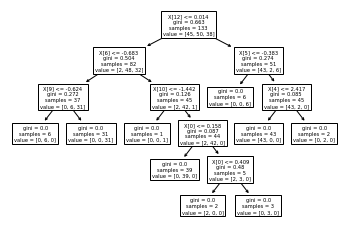

In [30]:
tree.plot_tree(clf_tree)

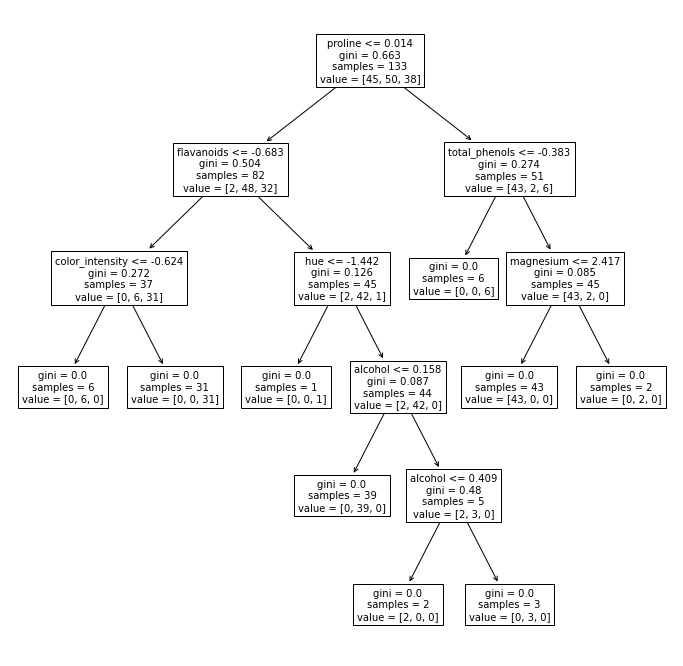

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf_tree, fontsize=10, feature_names=raw_wine['feature_names'])
plt.show()

In [35]:
from sklearn.tree import export_text
r = export_text(clf_tree, feature_names=raw_wine['feature_names'])
print(r)

|--- proline <= 0.01
|   |--- flavanoids <= -0.68
|   |   |--- color_intensity <= -0.62
|   |   |   |--- class: 1
|   |   |--- color_intensity >  -0.62
|   |   |   |--- class: 2
|   |--- flavanoids >  -0.68
|   |   |--- hue <= -1.44
|   |   |   |--- class: 2
|   |   |--- hue >  -1.44
|   |   |   |--- alcohol <= 0.16
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  0.16
|   |   |   |   |--- alcohol <= 0.41
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- alcohol >  0.41
|   |   |   |   |   |--- class: 1
|--- proline >  0.01
|   |--- total_phenols <= -0.38
|   |   |--- class: 2
|   |--- total_phenols >  -0.38
|   |   |--- magnesium <= 2.42
|   |   |   |--- class: 0
|   |   |--- magnesium >  2.42
|   |   |   |--- class: 1



In [8]:
pred = clf_tree.predict(X_te_std)
print(pred)
print(y_te)

[1 1 1 0 2 0 1 1 1 0 2 0 1 0 0 1 1 0 0 1 2 1 0 0 2 1 1 0 0 1 1 0 2 1 0 1 2
 1 1 2 2 1 1 0 2]
[1 1 1 0 1 0 1 1 1 0 2 0 1 0 0 1 1 0 0 1 2 1 0 0 2 1 1 0 0 1 1 0 2 1 0 1 2
 1 2 2 2 1 1 0 1]


In [12]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      0.91      0.93        22
           2       0.78      0.88      0.82         8

    accuracy                           0.93        45
   macro avg       0.91      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45



### 회귀 모형 예제

In [37]:
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)

In [39]:
y = 4 * (X - 0.5) ** 2

In [41]:
y = y + np.random.randn(m, 1) / 10

In [42]:
plt.plot(X, y, '.')

In [43]:
np.mean(y)

0.35386923462660264

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(tree_reg, fontsize=10)
plt.show()

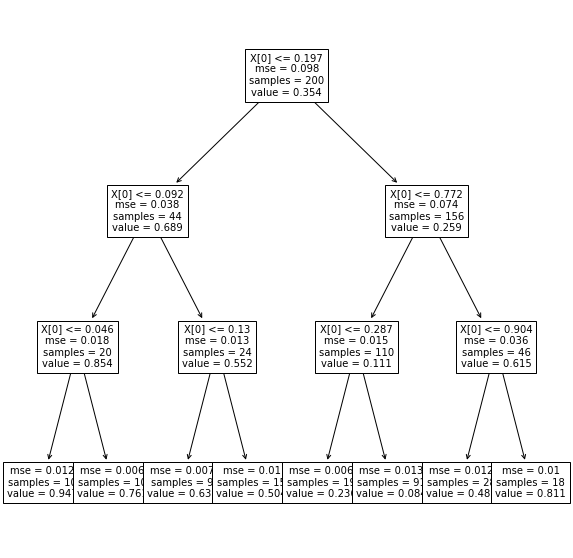

In [23]:
tree_reg3 = DecisionTreeRegressor(max_depth=3)
tree_reg3.fit(X, y)
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(tree_reg3, fontsize=10)
plt.show()

<img src="%0A">

### Cost complexity pruning example

In [56]:
from sklearn.datasets import load_breast_cancer


In [57]:
X, y = load_breast_cancer(return_X_y=True)

In [59]:
X[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = tree.DecisionTreeClassifier(random_state=0)

In [60]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [61]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [62]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [63]:
impurities

array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

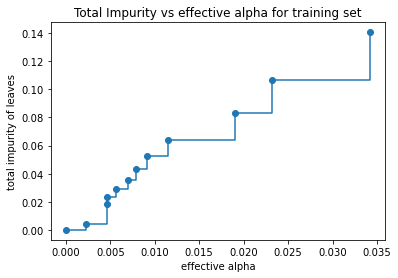

In [47]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [89]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.03422474765119576


In [90]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0)]

In [91]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [92]:
clfs[10].tree_.node_count

5

In [93]:
tree.plot_tree(clfs[8])

[Text(167.4, 190.26, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(83.7, 135.9, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(41.85, 81.53999999999999, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(251.10000000000002, 135.9, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(209.25, 81.53999999999999, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(292.95, 81.53999999999999, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

In [94]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

In [95]:
node_counts

[31, 27, 21, 19, 17, 15, 13, 11, 9, 7, 5]

In [96]:
depth

[8, 6, 4, 4, 4, 4, 4, 4, 3, 3, 2]

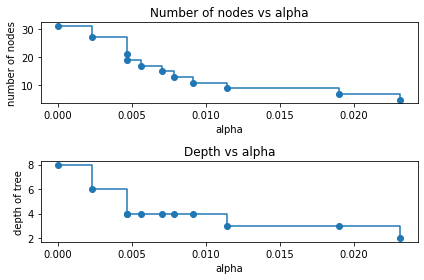

In [97]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [98]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [100]:
test_scores

[0.8811188811188811,
 0.8881118881118881,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.9230769230769231,
 0.9300699300699301,
 0.9300699300699301,
 0.9370629370629371,
 0.916083916083916,
 0.916083916083916]

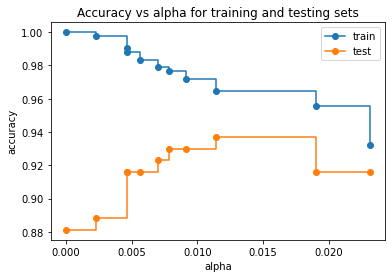

In [101]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
tree.plot_tree(clfs[8])

[Text(167.4, 190.26, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(83.7, 135.9, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(41.85, 81.53999999999999, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(251.10000000000002, 135.9, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(209.25, 81.53999999999999, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(292.95, 81.53999999999999, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

[Text(468.32142857142856, 770.1, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 679.5, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 588.9, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 498.3, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 407.7, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 317.1, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 317.1, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 226.5, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 135.89999999999998, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571, 45.30000000000007, 'gin

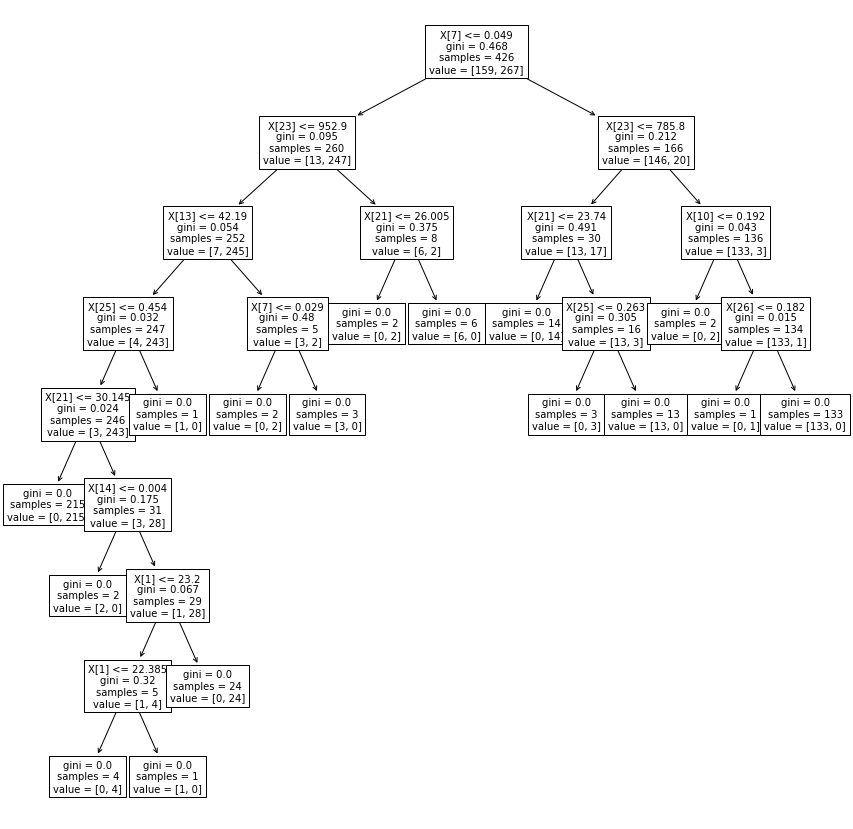

In [106]:
plt.figure(figsize=(15,15))  # set plot size (denoted in inches)

tree.plot_tree(clfs[0] , fontsize=10)